## Problem Statement

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

In [2]:
os.chdir(r'C:\Users\anami\Downloads')

In [3]:
Data_dict = pd.read_excel ('Data_dictionary.xlsx')
Data_dict

,Variable,Description
0,ID,Unique Identifier of a row
1,Age,Age of the customer
2,Gender,Gender of the customer (Male and Female)
3,Income,Yearly income of the customer
4,Balance,Average quarterly balance of the customer
5,Vintage,No. of years the customer is associated with bank
6,Transaction_Status,Whether the customer has done any transaction ...
7,Product_Holdings,No. of product holdings with the bank
8,Credit_Card,Whether the customer has a credit card or not
9,Credit_Category,Category of a customer based on the credit score


In [4]:
# DATA INSTALLATION
Org_data = pd.read_csv('train_data.csv')
Org_data

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [5]:
Org_data.shape

(6650, 11)

In [6]:
Org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [7]:
Org_data.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

### UNIVARIANT ANALYSIS

In [8]:
# AGE
Org_data['Age'].value_counts()

39    306
38    284
36    282
40    277
35    271
33    267
34    256
41    256
37    248
42    233
32    226
43    224
45    218
31    217
44    213
30    198
46    193
47    189
29    179
28    150
49    149
48    149
50    147
51    135
52    132
27    128
53    111
26    101
55     97
54     94
56     88
57     73
60     62
59     58
58     55
25     49
62     40
63     35
65     35
64     34
24     33
61     32
66     30
23     25
68     16
67     15
22     12
71     10
69      9
70      4
72      3
21      2
Name: Age, dtype: int64

For the better analysis we can create an age group column by data binning method. 

In [9]:
Org_data['age'] = pd.cut(x=Org_data['Age'], bins=[21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
                         labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','70+'])

In [10]:
# DROPPING ORIGINAL COLUMN
Org_data.drop (columns = 'Age', inplace = True)

In [11]:
# CHECKING FINAL COUNTS
Org_data['age'].value_counts()

36-40    1397
31-35    1237
41-45    1144
46-50     827
26-30     756
51-55     569
56-60     336
61-65     176
21-25     119
66-70      74
70+        13
Name: age, dtype: int64

In [12]:
# GENDER
Org_data['Gender'].value_counts()

Male      3612
Female    3038
Name: Gender, dtype: int64

In [13]:
# INCOME
Org_data['Income'].value_counts()

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64

In [14]:
# VINTAGE
Org_data['Vintage'].value_counts()

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64

Maximum customers are associated with bank only for 3 years, 2 years and 1 year. Very less no. of people are there who are associated either for 5 years or not even for a year. So, from business perspective we should focus on these 2 categories what kind or problems these people are facing.


In [15]:
Org_data['Transaction_Status'].value_counts()

1    3430
0    3220
Name: Transaction_Status, dtype: int64

In [16]:
Org_data['Credit_Category'].value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

In [17]:
Org_data['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [18]:
Org_data['Product_Holdings'].value_counts()

1     3200
2     3182
3+     268
Name: Product_Holdings, dtype: int64

### BIVARIANT ANALYSIS

<Figure size 432x288 with 0 Axes>

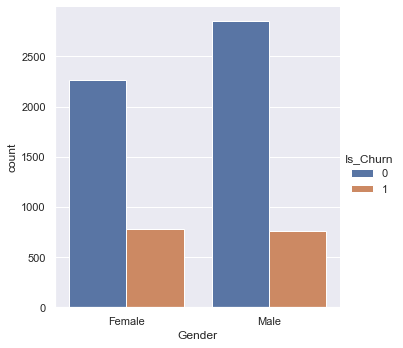

In [19]:
plt.figure()

sns.catplot (data = Org_data, x= 'Gender', hue = 'Is_Churn', kind= 'count') 

plt.show()

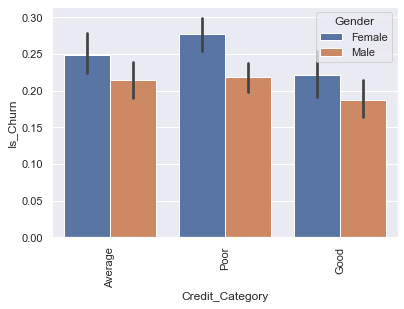

In [20]:
sns.barplot(data=Org_data,x='Credit_Category',y='Is_Churn',hue='Gender')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.4, 
                   hspace=0.4)

plt.show()

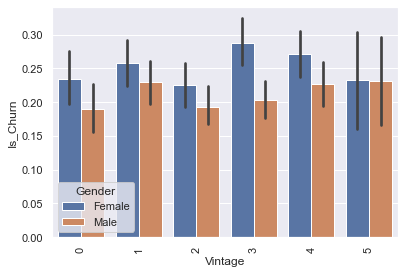

In [21]:
sns.barplot(data=Org_data,x='Vintage',y='Is_Churn',hue='Gender')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.4, 
                   hspace=0.4)

plt.show()

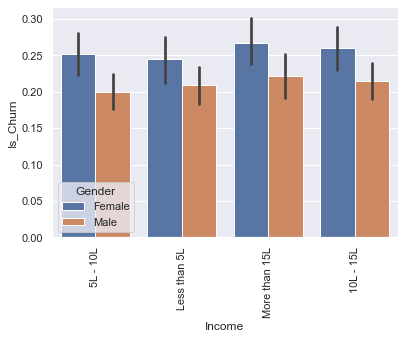

In [22]:
sns.barplot(data=Org_data,x='Income',y='Is_Churn',hue='Gender')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.4, 
                   hspace=0.4)

plt.show()

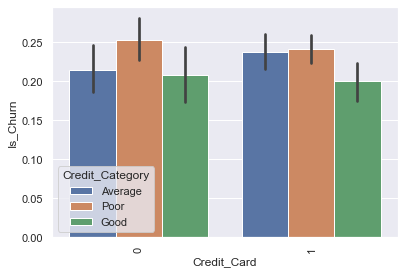

In [23]:
sns.barplot(data=Org_data,x='Credit_Card',y='Is_Churn',hue='Credit_Category')
plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                   bottom=0.1, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.4, 
                   hspace=0.4)

plt.show()

In [24]:
# STATISTICAL ANALYSIS
pd.set_option('display.float_format', lambda x: '%.3f' % x)
Org_data.describe (percentiles=[0.01, 0.02, 0.03, 0.05, 0.1, 0.25, 0.50, 0.75, 0.95, 0.96,0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,50%,75%,95%,96%,97%,98%,99%,max
Balance,6650.000,804595.355,515754.867,63.000,13719.330,25905.240,43395.080,67208.801,129847.401,392264.213,764938.575,1147123.710,1721617.555,1780429.604,1856511.243,1960667.141,2154397.173,2436615.810
Vintage,6650.000,2.250,1.459,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,3.000,4.000,5.000,5.000,5.000,5.000,5.000
Transaction_Status,6650.000,0.516,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Credit_Card,6650.000,0.664,0.472,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Is_Churn,6650.000,0.231,0.422,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000


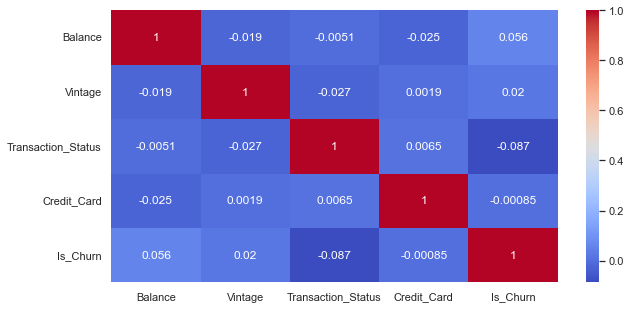

In [25]:
# CHECKING CORRELATION IN THE DATASET
corr_matrix = Org_data.corr() 

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

From the above graph we can see that there is no autocorrelation between the variables. 

### DATA CLEANING

In [26]:
Data = Org_data.copy()

In [27]:
# CHECKING MISSING VALUES
Data.isnull().sum()

ID                    0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
age                   2
dtype: int64

In [28]:
# REMOVING UNIQUE VARIABLE
Data.drop (columns = 'ID', inplace = True)

* CHANGING DATA TYPES OF VARIABLES FROM OBJECT TO INTEGER FOR MODEL BUILDING

In [29]:
# CHECKING DATA TYPES
Data.dtypes

Gender                  object
Income                  object
Balance                float64
Vintage                  int64
Transaction_Status       int64
Product_Holdings        object
Credit_Card              int64
Credit_Category         object
Is_Churn                 int64
age                   category
dtype: object

In [30]:
# Replacing MALE WITH 0 AND FEMALE WITH 1
Data ['Gender'] =  Data ['Gender'].replace ('Male', 0)
Data ['Gender'] =  Data ['Gender'].replace ('Female', 1)

In [31]:
# BALANCE 
Data ['Balance'] = Data ['Balance'].astype(int)

In [32]:
# CONVERTING 'PRODUCT_HOLDINGS' FROM OBJECT TO INTEGER
Data ['Product_Holdings'] = Data ['Product_Holdings'].replace ('3+', 3)
Data ['Product_Holdings'] = Data ['Product_Holdings'].astype(int)

APPLYING LABEL ENCODER FOR THE CONVERSION OF INCOME, Credit_Category & AGE

In [33]:
# IMPORTING LIBRARY
from sklearn.preprocessing import LabelEncoder

In [34]:
# CONVERTING INTO OBJECT 
LE = LabelEncoder()

In [35]:
# Age
Data ['age']= LE.fit_transform (Data ['age'])

# INCOME
Data ['Income']= LE.fit_transform (Data ['Income'])

# Credit_Category
Data ['Credit_Category']= LE.fit_transform (Data ['Credit_Category'])

In [36]:
# CHECKING THE FINAL RESULTS
Data.dtypes

Gender                int64
Income                int32
Balance               int32
Vintage               int64
Transaction_Status    int64
Product_Holdings      int32
Credit_Card           int64
Credit_Category       int32
Is_Churn              int64
age                   int32
dtype: object

## DATA MODELING

### ALGORITHM - LOGISTIC REGRESSION

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
#Splitting the DATA
X=Data.drop(columns=["Is_Churn"])
y=Data["Is_Churn"]

In [39]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=45)

In [40]:
# CONVERTING INTO OBJECT
Log = LogisticRegression()

In [41]:
Log.fit (X_train, y_train)

LogisticRegression()

In [42]:
print("Log Accuracy :", Log.score(X_train, y_train))
print("Log Accuracy  :", Log.score(X_test, y_test))

Log Accuracy : 0.7660580021482277
Log Accuracy  : 0.775438596491228


In [43]:
#Hyperparameter Optimization-tuning

from sklearn.model_selection import RandomizedSearchCV

params={'penalty':['l1','l2'], 'C':np.logspace(-4,4,20),'solver':['liblinear','sag','saga']}

In [44]:
log_randomcv = RandomizedSearchCV(Log, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [45]:
log_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   scoring='roc_auc', verbose=3)

In [46]:
# Identifying best estimator
lg_model = log_randomcv.best_estimator_
lg_model

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [47]:
print("Train score", lg_model.score(X_train, y_train))
print("Test Score", lg_model.score(X_test, y_test))

Train score 0.7660580021482277
Test Score 0.775438596491228


In [48]:
#predict:predict class labels for samples in X
lg_model.predict(X_train)
y_pred=lg_model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import classification_report

In [50]:
# Classification report

print("\n")
print("--------------------------Classification report----------------------------------")
print(classification_report(y_train, y_pred))



--------------------------Classification report----------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3566
           1       0.00      0.00      0.00      1089

    accuracy                           0.77      4655
   macro avg       0.38      0.50      0.43      4655
weighted avg       0.59      0.77      0.66      4655



In [51]:
from sklearn.metrics import precision_recall_fscore_support

In [52]:
Log_PRF= precision_recall_fscore_support(y_train, y_pred, average='macro')
Log_PRF

(0.38302900107411386, 0.5, 0.43376718160807687, None)

In [53]:
Log_precision = Log_PRF [0]
Log_recall = Log_PRF [1]
Log_f1_score = Log_PRF [2]

In [54]:
print (Log_recall)
print (Log_precision)
print (Log_f1_score)

0.5
0.38302900107411386
0.43376718160807687


### ALGORITHM - DECISION TREE [DT]

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [56]:
X=Data.drop(columns=["Is_Churn"])
y=Data["Is_Churn"]

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=99)

In [58]:
dt=DecisionTreeClassifier(random_state=99) 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [59]:
print("Train score :", dt.score(X_train, y_train))
print("Test score :", dt.score(X_test, y_test))

Train score : 1.0
Test score : 0.6639097744360902


In [60]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[100,40,50,30], 
              'max_depth':[9,8,7,10],
              "min_samples_leaf":[33,30,35,32]
             }


tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [9, 8, 7, 10],
                         'min_samples_leaf': [33, 30, 35, 32],
                         'min_samples_split': [100, 40, 50, 30]},
             verbose=1)

In [61]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 33,
 'min_samples_split': 100}

In [62]:
gsearch.best_score_

0.7586466165413535

In [63]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=100, min_samples_leaf=33)
dt_model.fit(X_train, y_train)
print("Train score :", dt_model.score(X_train, y_train))
print("Test score :", dt_model.score(X_test, y_test))

Train score : 0.7736842105263158
Test score : 0.7609022556390977


In [64]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=110, min_samples_leaf=35)
dt_model.fit(X_train, y_train)
print("Train score :", dt_model.score(X_train, y_train))
print("Test score :", dt_model.score(X_test, y_test))

Train score : 0.7725563909774437
Test score : 0.7661654135338346


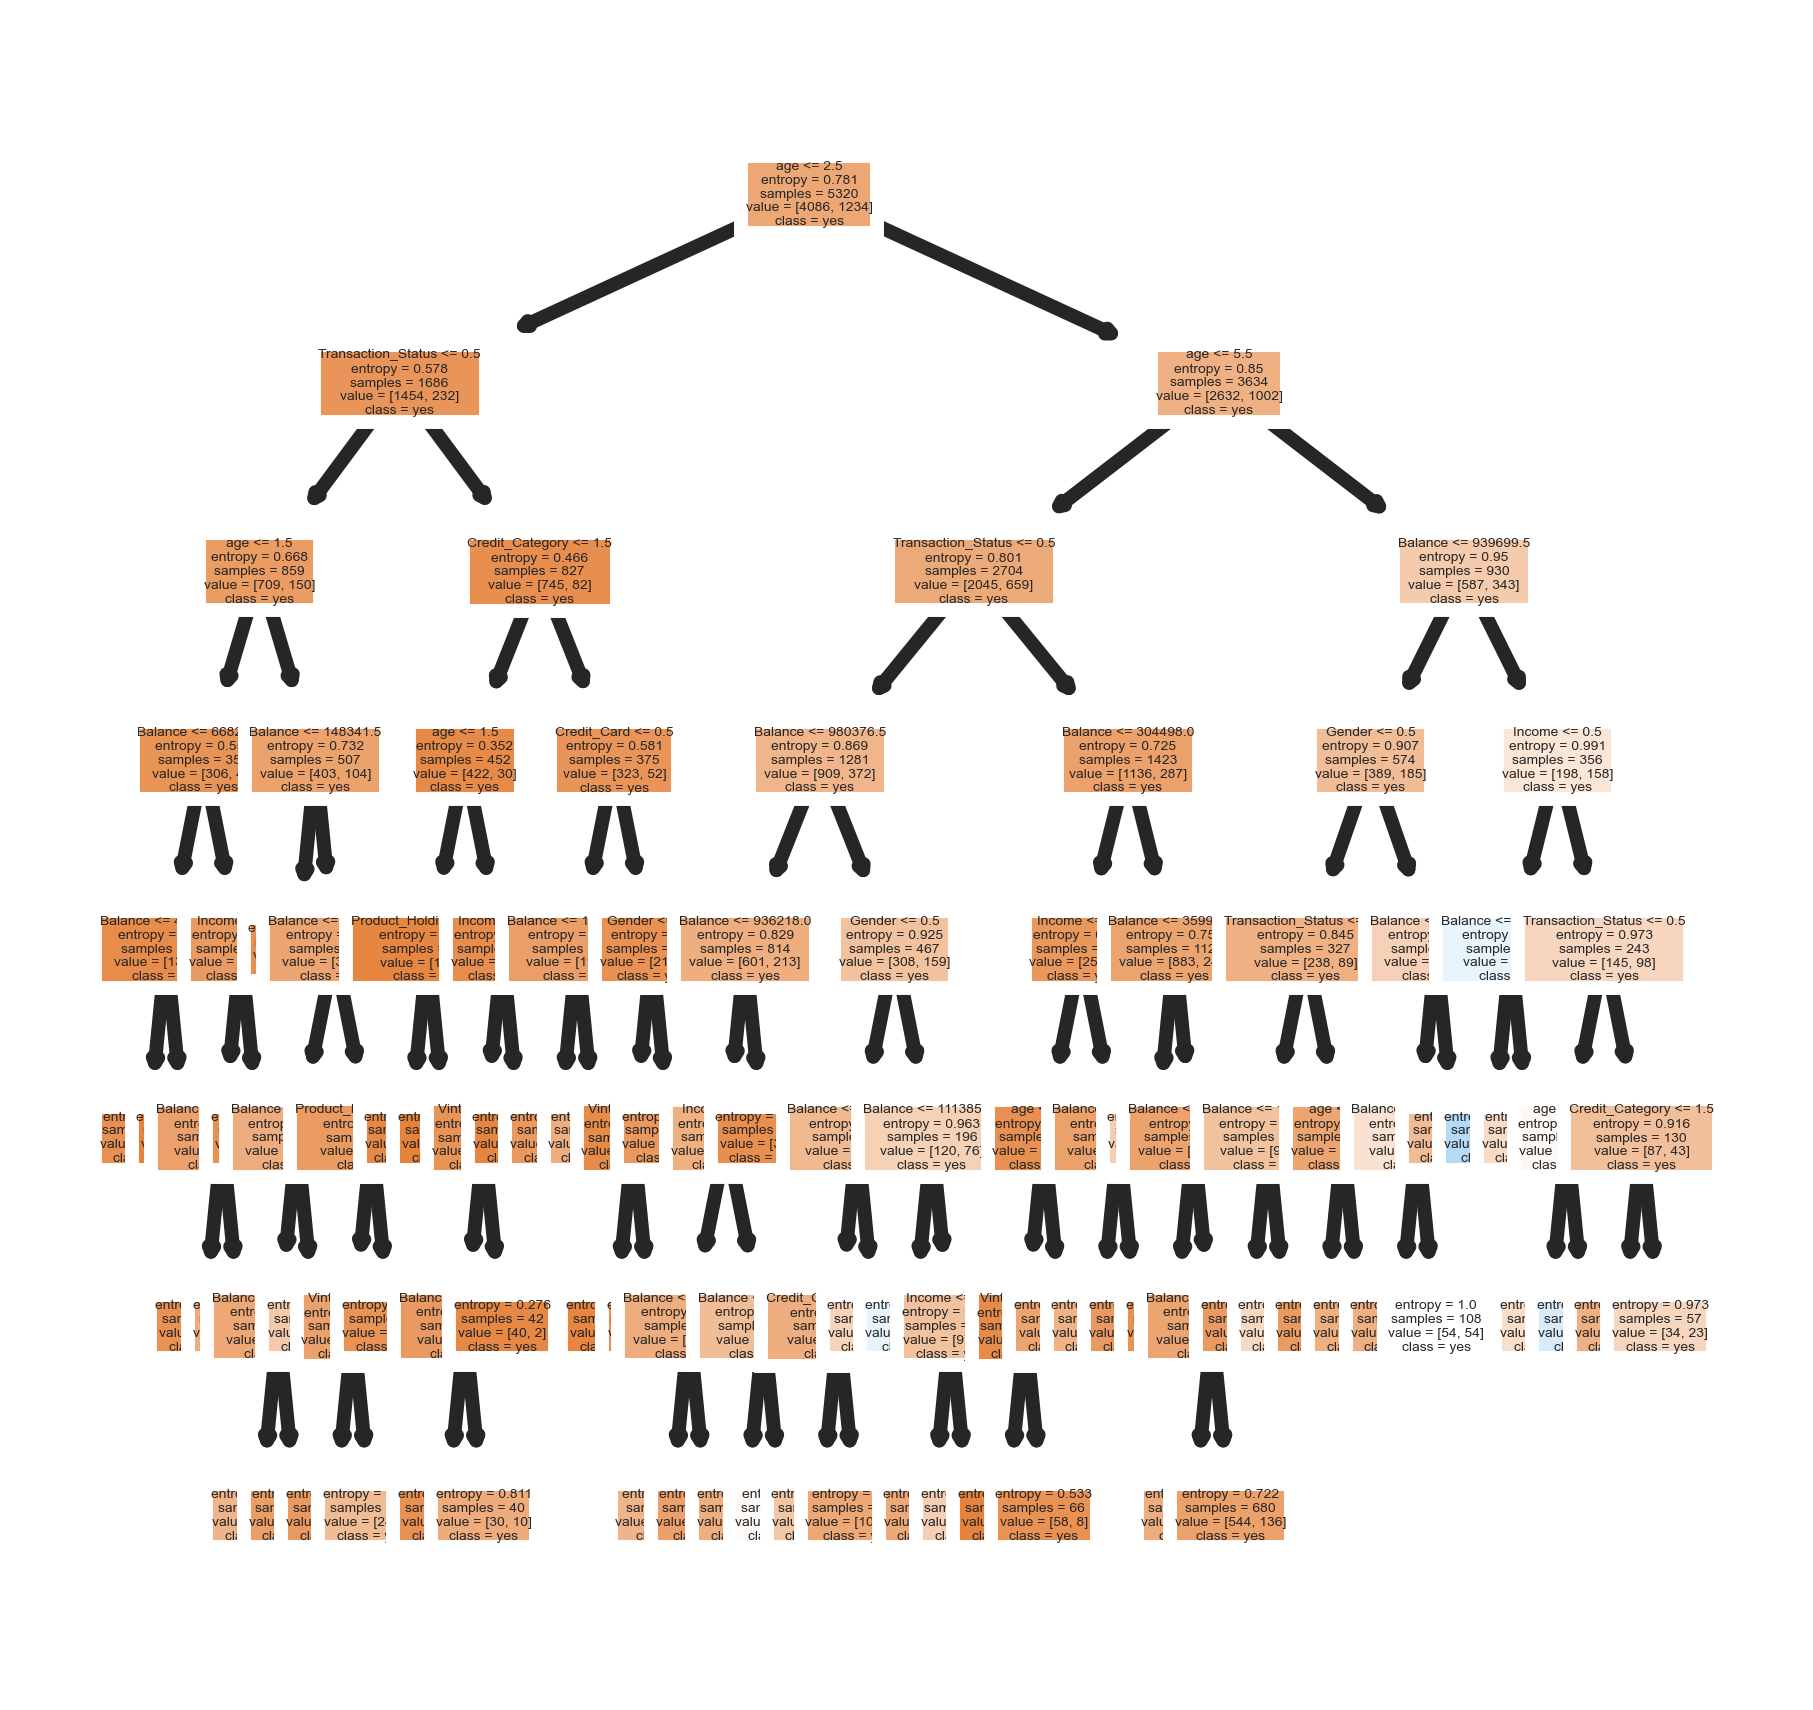

In [65]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 1000 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=1000)

dt_plot=plot_tree(dt_model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [66]:
dt_model.predict(X_train)
y_predict=dt_model.predict(X_train)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
#predict probab estimates
dt_proba=dt_model.predict_proba(X_train)
dt_proba

array([[0.71046229, 0.28953771],
       [0.83505155, 0.16494845],
       [0.64583333, 0.35416667],
       ...,
       [0.68571429, 0.31428571],
       [0.89333333, 0.10666667],
       [0.8       , 0.2       ]])

In [68]:
#evaluating model
#Accuracy on Train
print ("The Training Accuracy is:",dt_model.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",dt_model.score(X_test,y_test))

# Classification report
print ('\n')
print(classification_report(y_train,y_predict))

The Training Accuracy is: 0.7725563909774437
The Testing Accuracy is: 0.7661654135338346


              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4086
           1       0.57      0.08      0.14      1234

    accuracy                           0.77      5320
   macro avg       0.68      0.53      0.50      5320
weighted avg       0.73      0.77      0.70      5320



In [69]:
from sklearn.metrics import precision_recall_fscore_support

In [70]:
Dt_PRF= precision_recall_fscore_support(y_train, y_predict, average='macro')
Dt_PRF

(0.6752717391304348, 0.5300873203435695, 0.502983243249754, None)

In [71]:
Dt_precision = Dt_PRF [0]
Dt_recall = Dt_PRF [1]
Dt_f1_score = Dt_PRF [2]

In [72]:
print (Dt_precision)
print (Dt_recall)
print (Dt_f1_score)

0.6752717391304348
0.5300873203435695
0.502983243249754


### ALGORITHM - RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators" : [50,60,70],
            "criterion": ["gini", "entropy"],
            "max_depth" :[10,12, 8],
            "min_samples_split":[4,3,2],
            "min_samples_leaf" :[4,5,3],
            "max_features" :["log", "sqrt"],
            "bootstrap" : [True, False]
           }

rf=RandomForestClassifier()

rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=True, n_jobs=-1, cv=10)
rf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 8],
                         'max_features': ['log', 'sqrt'],
                         'min_samples_leaf': [4, 5, 3],
                         'min_samples_split': [4, 3, 2],
                         'n_estimators': [50, 60, 70]},
             scoring='accuracy', verbose=True)

In [75]:
rf_gs.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 50}

In [76]:
rf=RandomForestClassifier(criterion='entropy' ,max_depth=10, n_estimators= 70)

In [77]:
rf_model=rf.fit(X_train,y_train)
rf_model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=70)

In [78]:
rf_model.predict(X_train)
y_predictrf=rf_model.predict(X_train)
y_predictrf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
#predict probab estimates
rf_proba=rf_model.predict_proba(X_train)
rf_proba

array([[0.73565541, 0.26434459],
       [0.82310363, 0.17689637],
       [0.70687808, 0.29312192],
       ...,
       [0.61295578, 0.38704422],
       [0.90050253, 0.09949747],
       [0.87080861, 0.12919139]])

In [80]:
#Accuracy on Train
print ("The Training Accuracy is:",rf_model.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",rf_model.score(X_test,y_test))

The Training Accuracy is: 0.8163533834586466
The Testing Accuracy is: 0.7744360902255639


In [81]:
print("\n")
print("--------------------------Train classification report----------------------------------")
print(classification_report(y_train,y_predictrf))



--------------------------Train classification report----------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4086
           1       1.00      0.21      0.35      1234

    accuracy                           0.82      5320
   macro avg       0.90      0.60      0.62      5320
weighted avg       0.85      0.82      0.77      5320



In [82]:
from sklearn.metrics import precision_recall_fscore_support

In [83]:
Rf_PRF= precision_recall_fscore_support(y_train, y_predictrf, average='macro')
Rf_PRF

(0.9016458663761568, 0.604415718455159, 0.6194009418685105, None)

In [84]:
Rf_precision = Rf_PRF [0]
Rf_recall = Rf_PRF [1]
Rf_f1_score = Rf_PRF [2]

print (Rf_precision)
print (Rf_recall)
print (Rf_f1_score)

0.9016458663761568
0.604415718455159
0.6194009418685105


### ALGORITHM - SVM

In [85]:
from sklearn import metrics
from sklearn.svm import SVC 

In [86]:
Svm = SVC()

In [87]:
#Train the model using the training sets
Svm.fit(X_train, y_train)

SVC()

In [88]:
# Storing trained data in a variable
sv_model=Svm.fit(X_train,y_train)
sv_model

SVC()

In [89]:
print("Train score ", Svm.score(X_train, y_train))
print("Test Score", Svm.score(X_test, y_test))

Train score  0.7680451127819549
Test Score 0.7721804511278195


In [91]:
clf = SVC(gamma = 1)
sv_model = clf.fit(X_train, y_train)

In [92]:
sv_model.predict(X_train)
y_predictsv=sv_model.predict(X_train)
y_predictsv

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [93]:
#evaluating model
#Accuracy on Train
print ("The Training Accuracy is:",clf.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",clf.score(X_test,y_test))

# Classification report
print ('\n')
print(classification_report(y_train,y_predictsv))

The Training Accuracy is: 1.0
The Testing Accuracy is: 0.7721804511278195


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4086
           1       1.00      1.00      1.00      1234

    accuracy                           1.00      5320
   macro avg       1.00      1.00      1.00      5320
weighted avg       1.00      1.00      1.00      5320



In [94]:
Svm_PRF= precision_recall_fscore_support(y_train, y_predictsv, average='macro')
Svm_PRF

(1.0, 1.0, 1.0, None)

In [97]:
Svm_precision = Svm_PRF [0]
Svm_recall = Svm_PRF [1]
Svm_f1_score = Svm_PRF [2]

print (Svm_precision)
print (Svm_recall)
print (Svm_f1_score)

1.0
1.0
1.0


### COMPARISON OF THE MODELS

In [102]:
Col_Name=["Model Name","Accuracy","Recall","Precision", "F1_Score"]

In [103]:
Model_Name=["Logistic Regression","Decision Tree","Random Forest","SVM"]

In [104]:
Accuracy = [round (Log.score(X_test, y_test),2), round (dt_model.score(X_test,y_test), 2), 
            round (rf_model.score(X_test,y_test), 2), round(clf.score(X_test,y_test), 2)]

In [105]:
Recall = [Log_recall, Dt_recall, Rf_recall, Svm_recall]

In [106]:
Precision = [Log_precision, Dt_precision, Rf_precision, Svm_precision]

In [107]:
F1_Score = [Log_f1_score, Dt_f1_score, Rf_f1_score, Svm_f1_score]

In [108]:
Comp =(Model_Name,Accuracy,Recall,Precision, F1_Score)

In [109]:
Comp_df=pd.DataFrame(Comp)

In [110]:
Comparison_df=pd.DataFrame(data=list(zip(Model_Name,Accuracy,Recall,Precision, F1_Score)),columns=Col_Name)

In [111]:
Comparison_df

,Model Name,Accuracy,Recall,Precision,F1_Score
0,Logistic Regression,0.770,0.500,0.383,0.434
1,Decision Tree,0.770,0.530,0.675,0.503
2,Random Forest,0.770,0.604,0.902,0.619
3,SVM,0.770,1.000,1.000,1.000


## TESTING DATA

In [98]:
# DATA INSTALLATION
Test_data = pd.read_csv('test_data.csv')
Test_data

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.390,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.720,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.100,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.930,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.030,2,1,3+,0,Good
...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.220,0,0,1,1,Poor
2847,52d5bc8d,48,Female,More than 15L,1448280.270,0,1,2,1,Average
2848,f708121b,59,Male,More than 15L,1100555.640,3,0,1,1,Poor
2849,f008715d,34,Female,5L - 10L,1502818.920,2,0,1,1,Poor


### DATA CLEANING

In [101]:
# DROPPING UNIQUE VARIABLES
Test_data.drop (columns = ['ID'], inplace = True)